# Datasets para entrenar Redes Neuronales

## 1. Caso de estudio: "Dogs vs Cats"

### 1.1. Obtención de los datos

In [9]:
import os
import zipfile

local_zip = os.path.join('datasets', 'cats_and_dogs_small.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### 1.2. Datos para entrenar, validar y probar

In [10]:
base_dir = os.path.join('datasets', 'cats_and_dogs_small')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directorio con las imágenes de train
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imágenes de validación
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imágenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [11]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir(validation_cats_dir)
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir(validation_dogs_dir)
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir(test_cats_dir)
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir(test_dogs_dir)
print(test_dog_fnames[:5])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']
['1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg']
['1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg']
['1500.jpg', '1501.jpg', '1502.jpg', '1503.jpg', '1504.jpg']
['1500.jpg', '1501.jpg', '1502.jpg', '1503.jpg', '1504.jpg']


In [12]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_cats_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
    # Presentamos imágenes en una configuración de 4x4
    nrows = 4
    ncols = 4

    pic_index = 0   # Índice para iterar sobre las imágenes

    fig = plt.gcf()
    fig.set_size_inches(ncols*4, nrows*4)

    pic_index += 8
    
    next_pix = [os.path.join(dir, fname) for fname in fnames[pic_index-8:pic_index]]

    for i, img_path in enumerate(next_pix):
        sp = plt.subplot(nrows, ncols, i+1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
    
    plt.show()

Figura 10.3


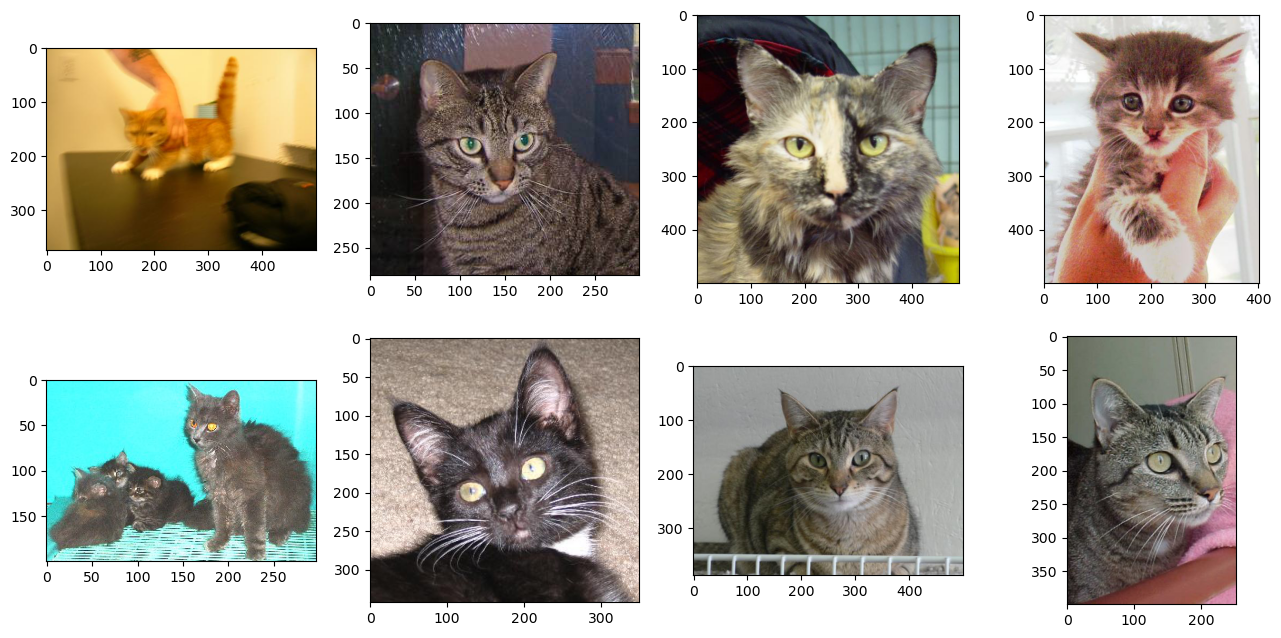

Figura 10.4


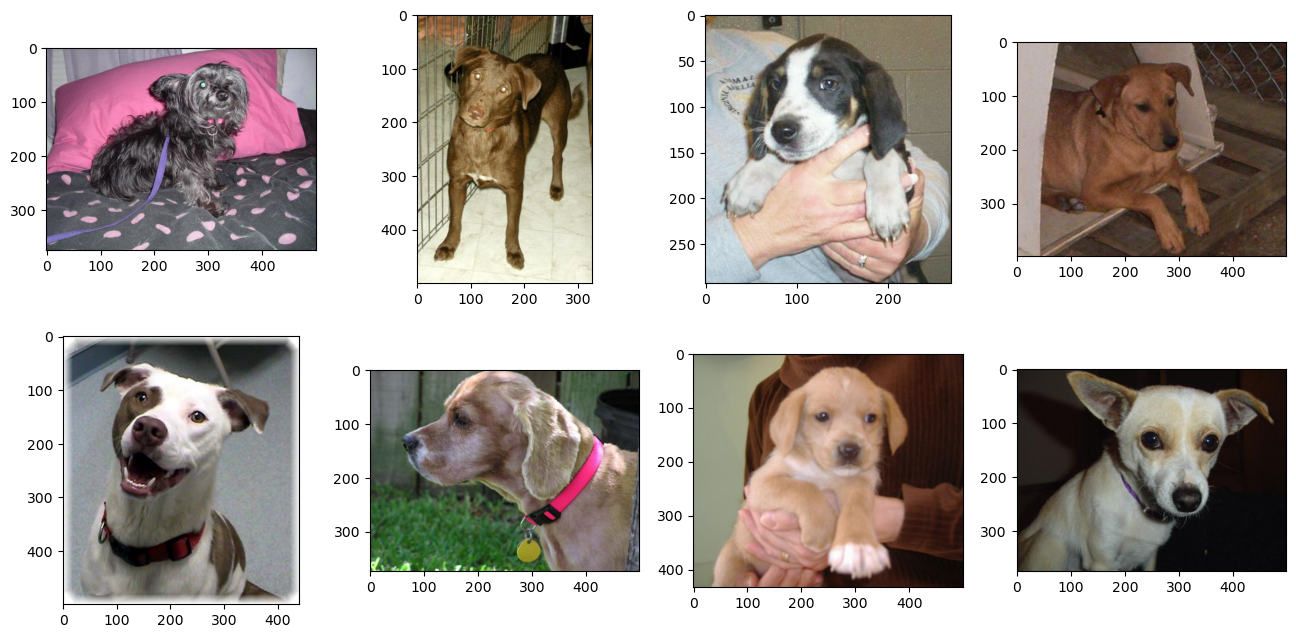

Figura 10.5


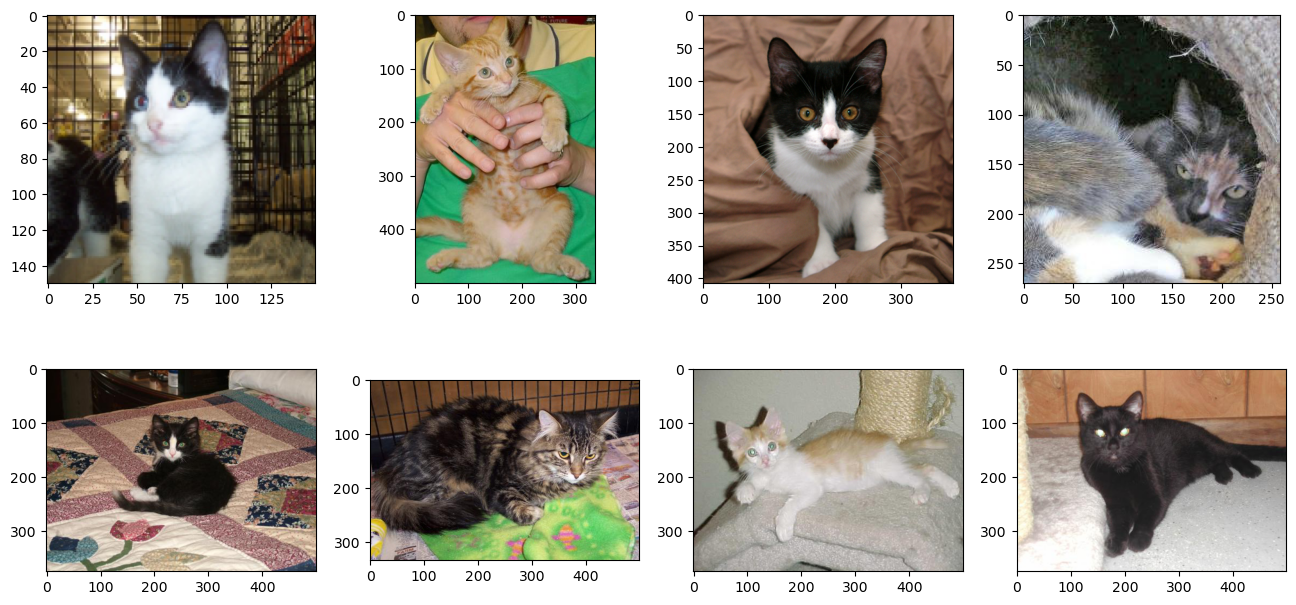

Figura 10.6


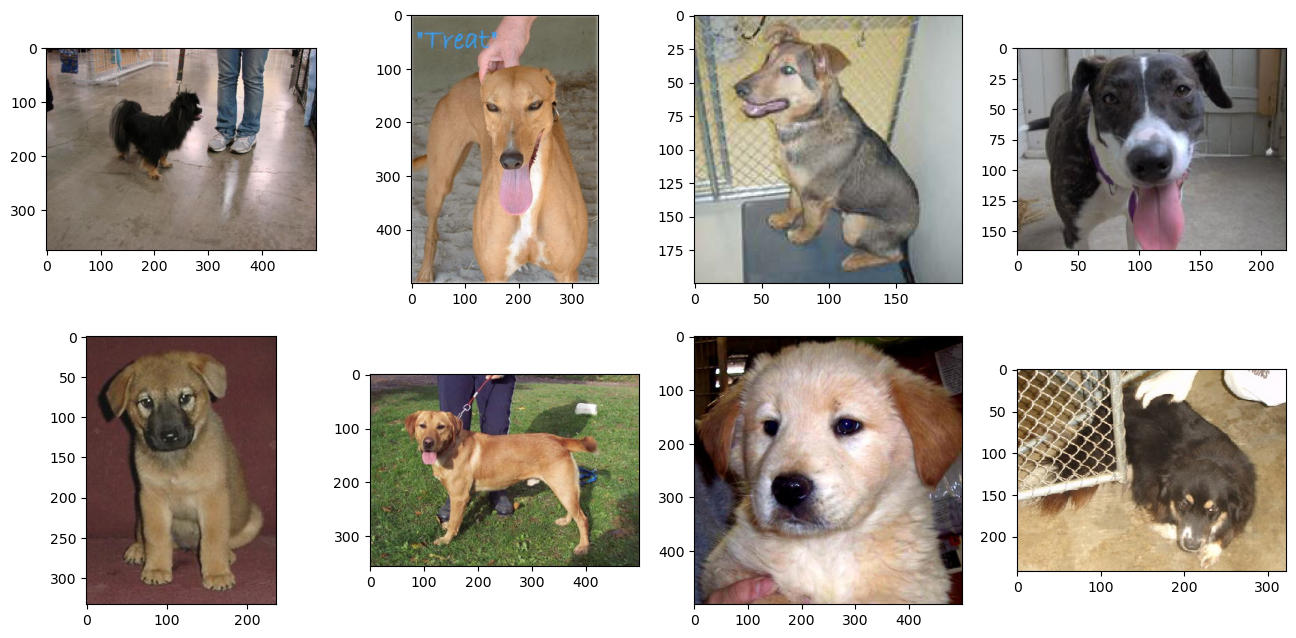

Figura 10.7


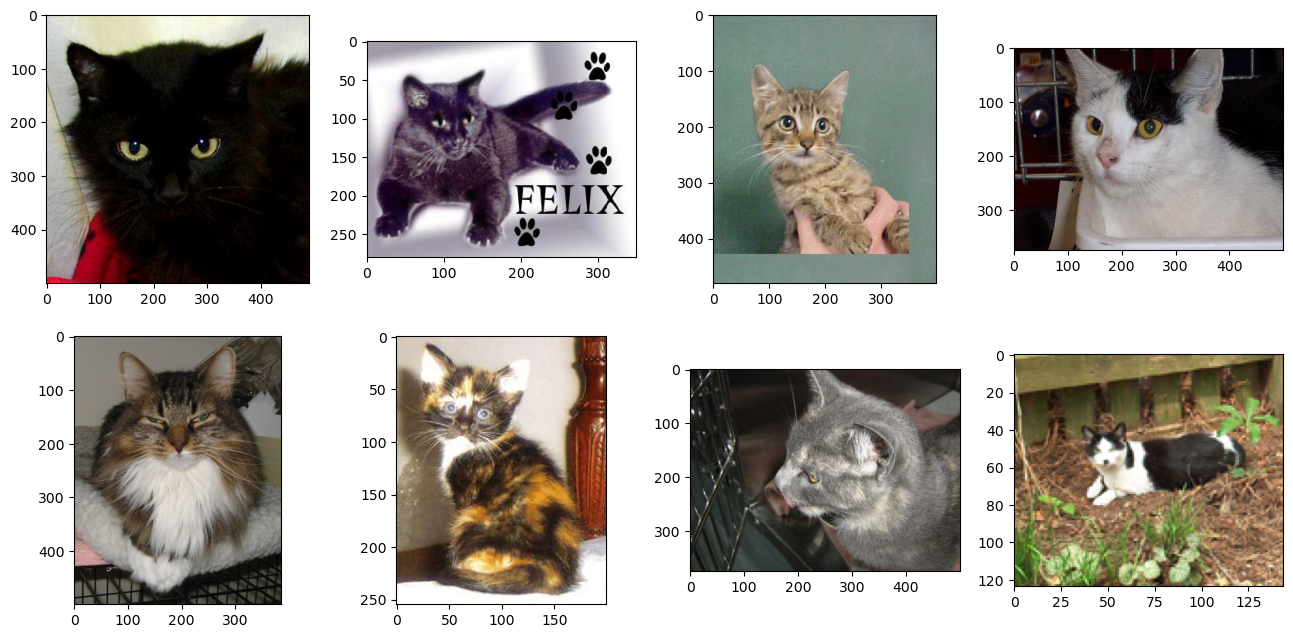

Figura 10.8


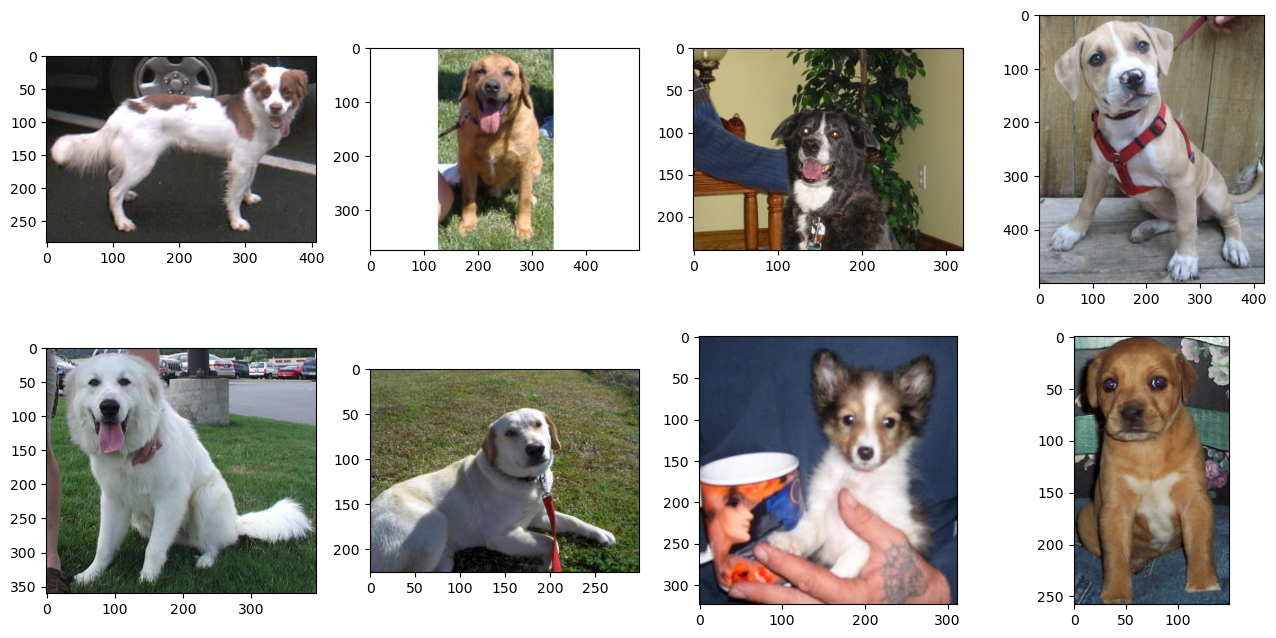

In [14]:
print("Figura 10.3")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura 10.4")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura 10.5")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura 10.6")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura 10.7")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura 10.8")
print_pictures(test_dogs_dir, test_dog_fnames)

### 1.3. Modelo de reconocimiento de imágenes reales

In [15]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### 1.4. Preprocesado de datos reales con ImageDataGenerator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

test_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 2. Solucionar problemas de sobreentrenamiento

### 2.1. Modelos a partir de conjuntos de datos pequeños

In [21]:
batch_size = 20
steps_per_epochs = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print(steps_per_epochs)
print(validation_steps)

100
50


In [22]:
print("[INFO] Entrenando Red Neuronal...")
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epochs,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2
)

[INFO] Entrenando Red Neuronal...
Epoch 1/100
100/100 - 12s - loss: 0.6811 - acc: 0.5630 - val_loss: 0.6556 - val_acc: 0.6030 - 12s/epoch - 122ms/step
Epoch 2/100
100/100 - 5s - loss: 0.6375 - acc: 0.6365 - val_loss: 0.6334 - val_acc: 0.6550 - 5s/epoch - 47ms/step
Epoch 3/100
100/100 - 5s - loss: 0.5924 - acc: 0.6835 - val_loss: 0.6525 - val_acc: 0.6220 - 5s/epoch - 46ms/step
Epoch 4/100
100/100 - 5s - loss: 0.5524 - acc: 0.7165 - val_loss: 0.6195 - val_acc: 0.6550 - 5s/epoch - 47ms/step
Epoch 5/100
100/100 - 5s - loss: 0.5272 - acc: 0.7320 - val_loss: 0.5831 - val_acc: 0.6860 - 5s/epoch - 47ms/step
Epoch 6/100
100/100 - 5s - loss: 0.4992 - acc: 0.7540 - val_loss: 0.5934 - val_acc: 0.6850 - 5s/epoch - 47ms/step
Epoch 7/100
100/100 - 5s - loss: 0.4705 - acc: 0.7770 - val_loss: 0.6976 - val_acc: 0.6500 - 5s/epoch - 47ms/step
Epoch 8/100
100/100 - 5s - loss: 0.4483 - acc: 0.7880 - val_loss: 0.6170 - val_acc: 0.6730 - 5s/epoch - 45ms/step
Epoch 9/100
100/100 - 5s - loss: 0.4200 - acc: 0.79

### 2.2. Visualización del comportamiento del entrenamiento

In [23]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

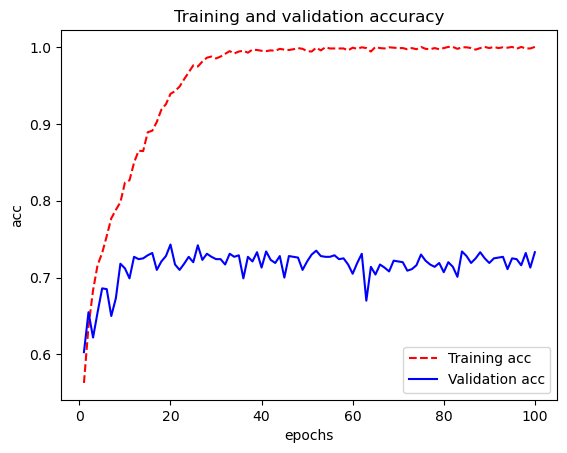

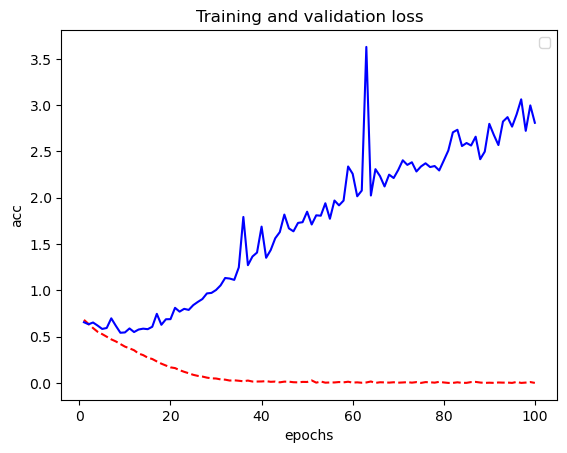

<Figure size 640x480 with 0 Axes>

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1, 1)

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [25]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy", test_acc)

50/50 [==============================] - 2s 31ms/step - loss: 2.8093 - acc: 0.7330
Test Accuracy 0.7329999804496765
